In [2]:
import sys
from pathlib import Path

Jupyter server should be run at the notebook directory, so the output of the following cell would be the project root:

In [3]:
project_root = str(Path.cwd().resolve().parent)
print(f"Project root: {project_root}")

Project root: C:\Users\Nitya Karthik A\ds4cg-job-analytics


In [4]:
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [5]:
%load_ext autoreload
# Reload all modules imported with %aimport every time before executing the Python code typed.
%autoreload 1
%aimport src.visualization.columns, src.database.database_connection, \
    src.visualization.models, src.preprocess.preprocess

In [6]:
from src.visualization import ColumnVisualizer
from src.preprocess import preprocess_data
from src.database import DatabaseConnection

In [7]:
db_connection = DatabaseConnection("../data/slurm_data.db")
jobs_df = db_connection.fetch_all_jobs()

Connected to ../data/slurm_data.db


In [8]:
clean_jobs_df = preprocess_data(jobs_df, min_elapsed_seconds=600)
clean_jobs_df

[Preprocessing] Running with new database format: GPU types as dictionary.


,JobID,ArrayJobID,ArrayID,JobName,IsArray,Interactive,Account,User,Constraints,QOS,...,GPUComputeUsage,CPUMemUsage,CPUComputeUsage,Queued,vram_constraint,partition_constraint,requested_vram,allocated_vram,user_jobs,account_jobs
2,38482061,<NA>,-1,joby42h-n,False,non-interactive,pi_zhangl_uri_edu,zhangl_uri_edu,['avx512'],long,...,0.0,2.576670e+10,99.143585,3 days 01:23:00,<NA>,<NA>,<NA>,320,954,1304
22,38634311,<NA>,-1,job.sh,False,non-interactive,pi_grason_umass_edu,rvmathew_umass_edu,['2080ti'],normal,...,88.0,5.945262e+08,99.912697,0 days 00:00:18,<NA>,<NA>,<NA>,11,118778,118778
23,38634905,<NA>,-1,job.sh,False,non-interactive,pi_grason_umass_edu,rvmathew_umass_edu,['2080ti'],normal,...,88.0,6.020669e+08,99.949554,0 days 00:00:31,<NA>,<NA>,<NA>,11,118778,118778
24,38634906,<NA>,-1,job.sh,False,non-interactive,pi_grason_umass_edu,rvmathew_umass_edu,['2080ti'],normal,...,90.0,6.128353e+08,99.956528,0 days 00:00:20,<NA>,<NA>,<NA>,11,118778,118778
25,38634956,<NA>,-1,job.sh,False,non-interactive,pi_grason_umass_edu,rvmathew_umass_edu,['2080ti'],normal,...,90.0,5.236490e+08,99.956741,0 days 00:00:26,<NA>,<NA>,<NA>,11,118778,118778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123695,40133315,<NA>,-1,a775a96d-ca15-43de-a940-c8cd33d32927,False,non-interactive,pi_drsheldon_umass_edu,mmfuentes_umass_edu,"['2080ti', 'rtx8000', 'a40']",normal,...,6.0,4.910178e+09,52.504284,0 days 00:38:43,48,<NA>,48,48,4828,6598
11123759,40133810,<NA>,-1,a775a96d-ca15-43de-a940-c8cd33d32927,False,non-interactive,pi_drsheldon_umass_edu,mmfuentes_umass_edu,"['2080ti', 'rtx8000', 'a40']",normal,...,38.0,4.065432e+09,99.375938,0 days 00:18:15,48,<NA>,48,11,4828,6598
11123765,40134049,<NA>,-1,alphafold3_ahr_pfos,False,non-interactive,pi_biochem642_umass_edu,dhmiller_umass_edu,['vram48'],normal,...,1.0,3.218020e+10,82.862061,0 days 00:00:14,48,<NA>,48,48,8,19
11123767,40134060,<NA>,-1,bRunGeolinking.sh,False,non-interactive,pi_brenocon_umass_edu,tmasis_umass_edu,['sm_70'],normal,...,1.0,7.510876e+08,49.521332,0 days 00:00:17,<NA>,<NA>,<NA>,32,115,679


In [9]:
visualizer = ColumnVisualizer(clean_jobs_df.sample(10000, random_state=42))

Skipping visualization for column type 'ArrayJobID' in DataFrame.
Skipping visualization for column type 'JobName' in DataFrame.


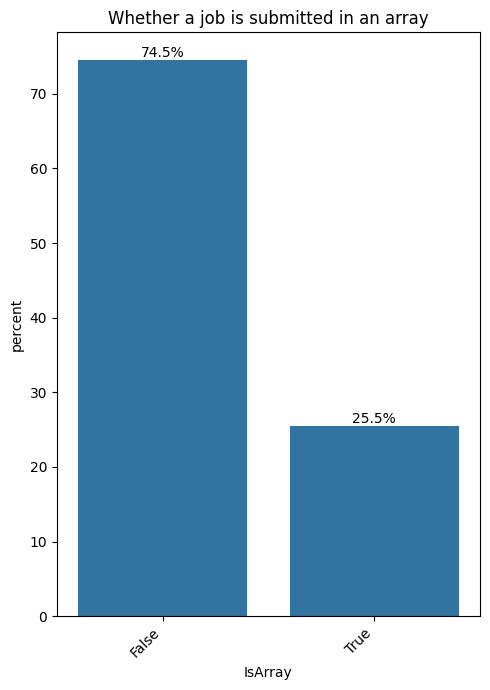

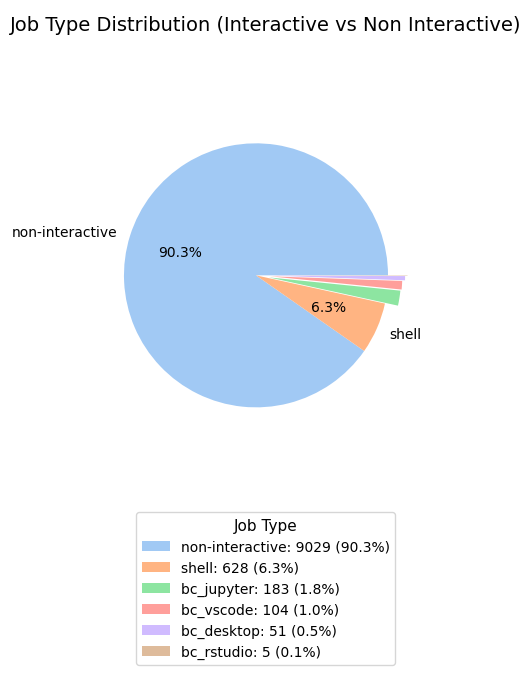

Skipping visualization for column type 'Account' in DataFrame.
Skipping visualization for column type 'User' in DataFrame.


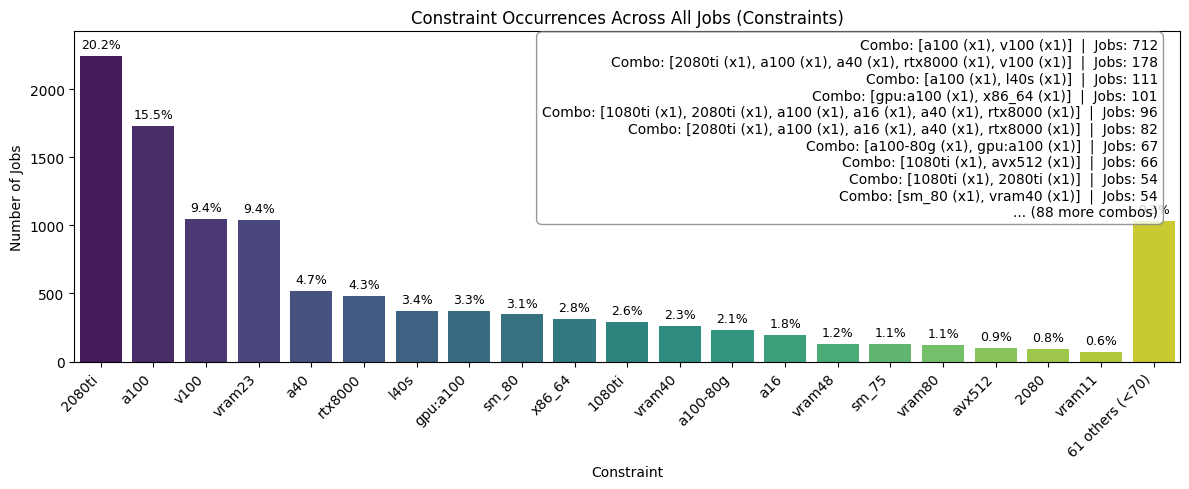

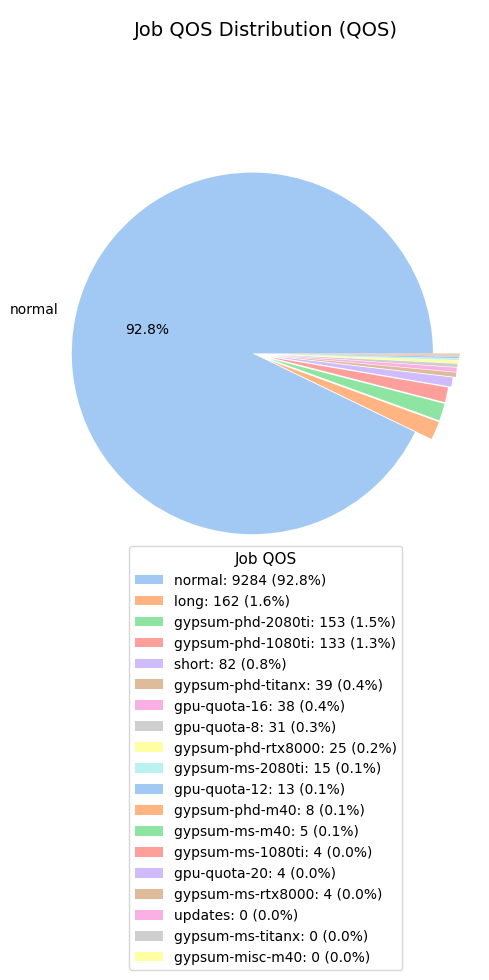

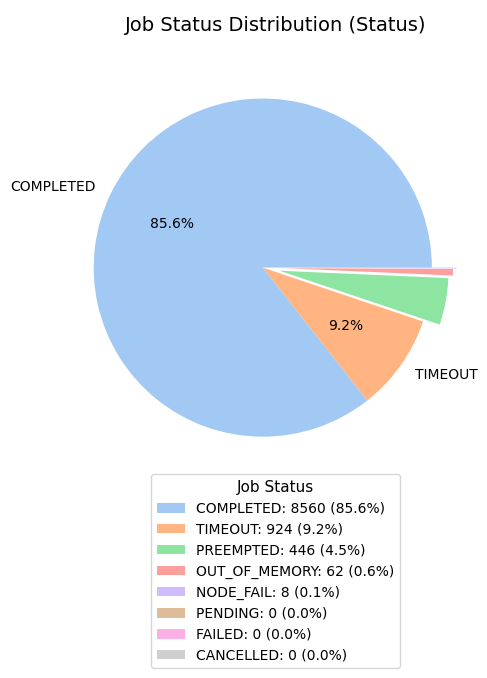

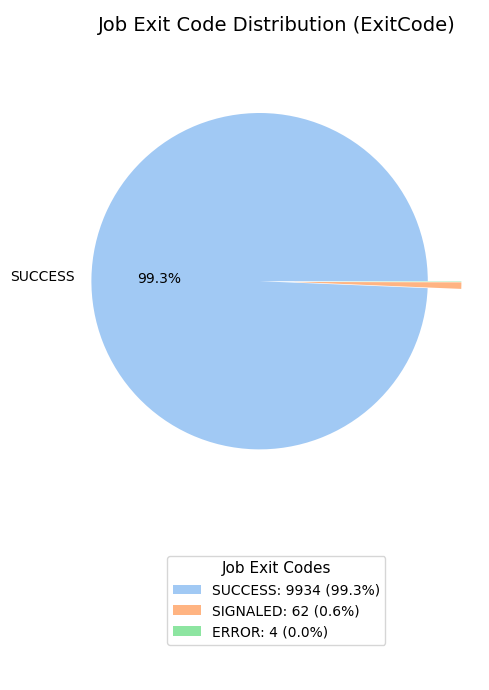

Skipping visualization for column type 'SubmitTime' in DataFrame.


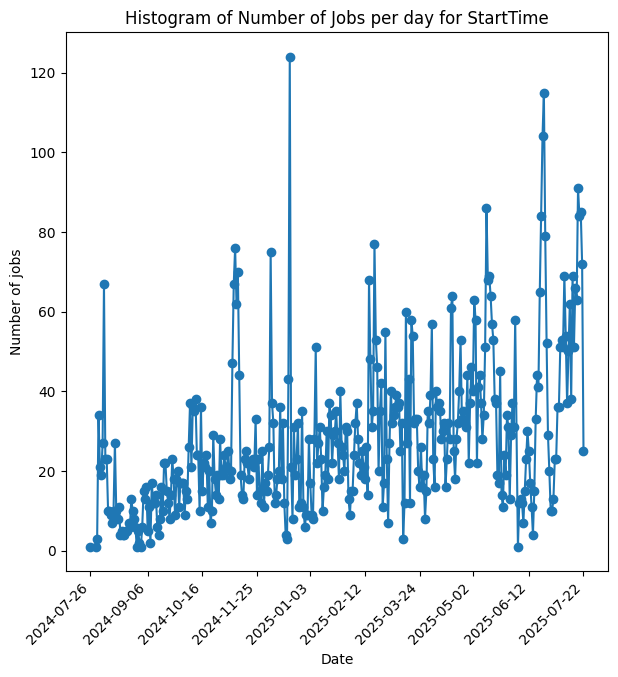

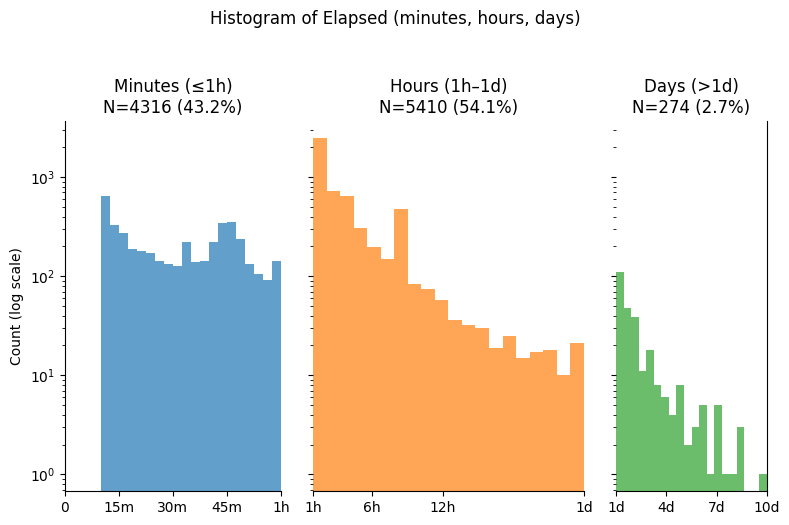

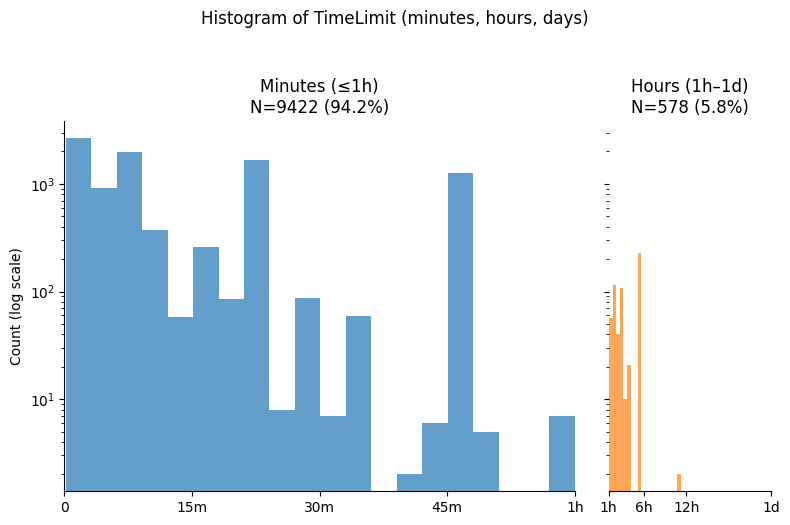

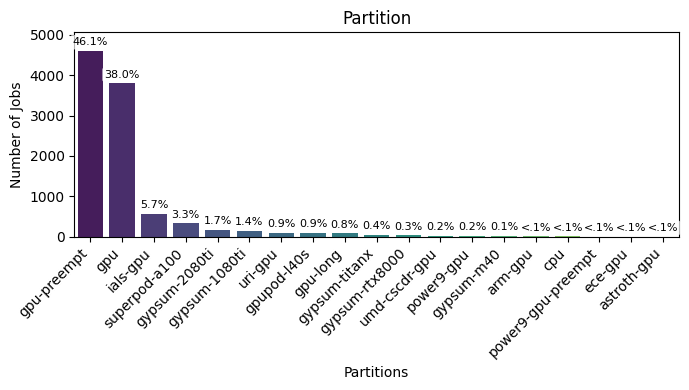

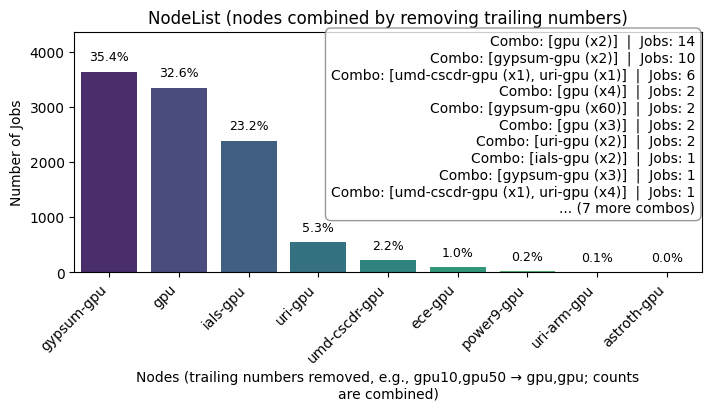

Skipping visualization for column type 'CPUs' in DataFrame.


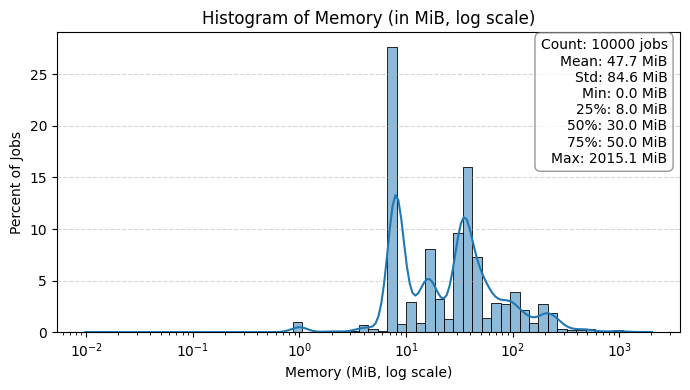

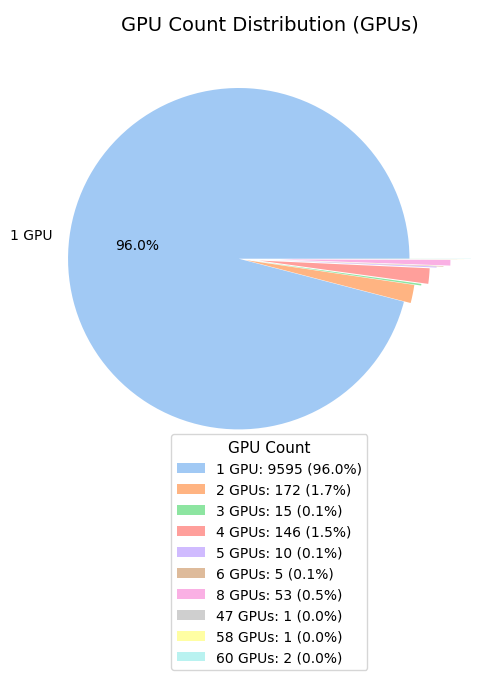

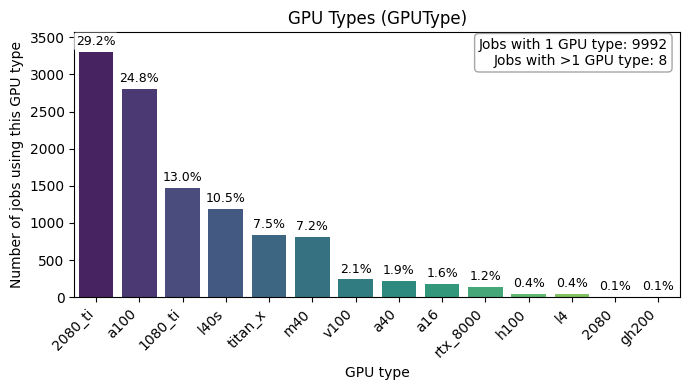

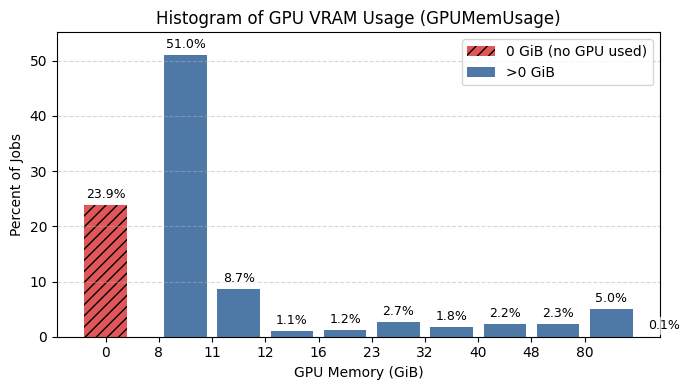

Skipping visualization for column type 'GPUComputeUsage' in DataFrame.


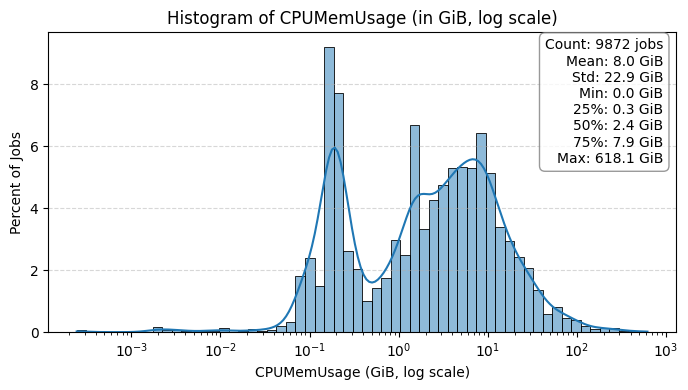

Skipping visualization for column type 'CPUComputeUsage' in DataFrame.
Skipping visualization for column type 'Queued' in DataFrame.
Skipping visualization for column type 'vram_constraint' in DataFrame.
Skipping visualization for column type 'partition_constraint' in DataFrame.
Skipping visualization for column type 'requested_vram' in DataFrame.
Skipping visualization for column type 'allocated_vram' in DataFrame.
Skipping visualization for column type 'user_jobs' in DataFrame.
Skipping visualization for column type 'account_jobs' in DataFrame.


In [11]:
visualizer.visualize(
    output_dir_path=Path("../data/visualizations"),
    columns=None,
)